# Programa de capacitação

**Introdução à comunicações digitais**

Adolfo Fernandes Herbster

<a href="https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/" target="_blank">https://sites.google.com/a/dee.ufcg.edu.br/adolfo-herbster/</a>

<a href="mailto:adolfofh@dee.ufcg.edu.br">adolfofh@dee.ufcg.edu.br</a>

Embedded/DEE/CEEI/UFCG - 2019

# Sistemas digitais coerentes 

In [1]:
import numpy as num
import matplotlib.pyplot as plt
import sk_dsp_comm.sigsys as ss
from scipy import signal

## Teorema da modulação

In [10]:
Fc  = 10  # frequência da portadora 
Fs  = 100 # taxa de amostragem em Hz
tau = 1   # meia largura de pulso
t   = num.arange(-5, 5, 1/Fs);
x   = ss.tri(t, tau);
y   = x * num.cos(2 * num.pi * Fc * t);
f,X = ss.ft_approx(x, t, 4096);
f,Y = ss.ft_approx(y, t, 4096);

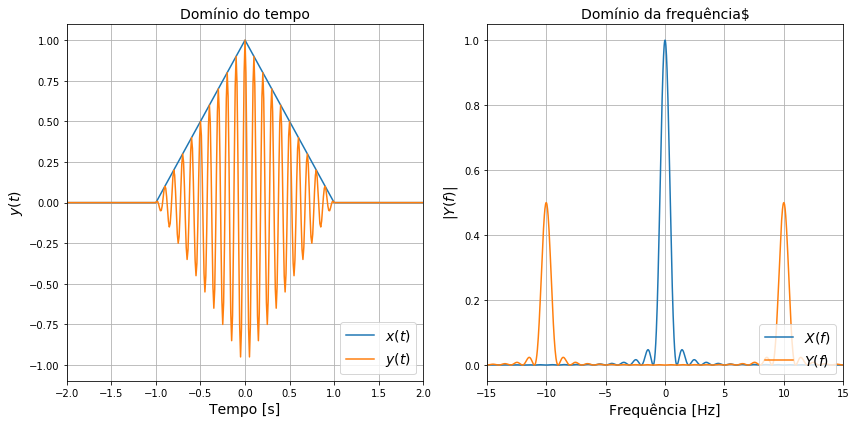

In [11]:
plt.figure(figsize=(12,6));
plt.subplot(121)
plt.plot(t,x)
plt.plot(t,y)
plt.grid()
plt.ylim([-1.1,1.1])
plt.xlim([-2,2])
plt.legend((r'$x(t)$', r'$y(t)$'), loc='lower right', fontsize = 14);
plt.title(r'Domínio do tempo', fontsize = 14);
plt.xlabel(r'Tempo [s]', fontsize = 14);
plt.ylabel(r'$y(t)$', fontsize = 14);

plt.subplot(122)
plt.plot(f, abs(X));
plt.plot(f, abs(Y));
plt.grid()
plt.legend((r'$X(f)$', r'$Y(f)$'), loc='upper right', fontsize = 14);
plt.title(r'Domínio da frequência$', fontsize = 14);
plt.xlim([-15,15])
plt.xlabel(r'Frequência [Hz]', fontsize = 14);
plt.ylabel(r'$|X(f)|$ & $|Y(f)|$', fontsize = 14);
plt.tight_layout();

In [25]:
z = y * num.cos(2 * num.pi * Fc * t);
f,Z = ss.ft_approx(z, t, 4096);

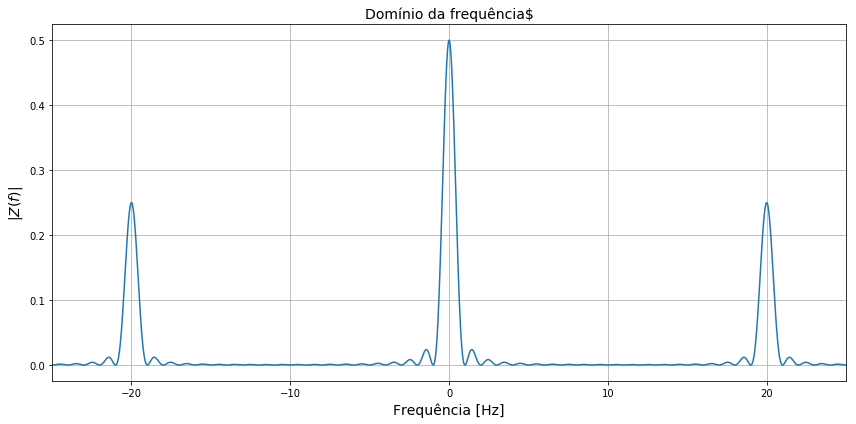

In [27]:
plt.figure(figsize=(12,6));
plt.plot(f, abs(Z));
plt.grid()
plt.title(r'Domínio da frequência$', fontsize = 14);
plt.xlim([-25,25])
plt.xlabel(r'Frequência [Hz]', fontsize = 14);
plt.ylabel(r'$|Z(f)|$', fontsize = 14);
plt.tight_layout();

In [36]:
w = Fc*num.sinc(Fc*t);
f,W = ss.ft_approx(w, t, 4096);

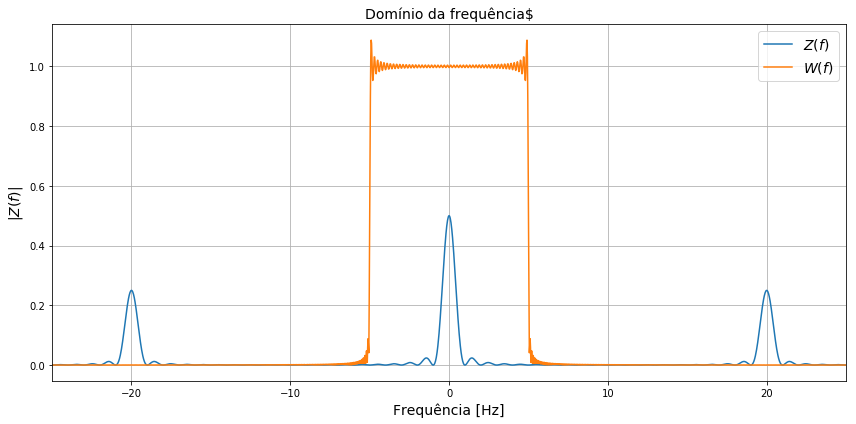

In [39]:
plt.figure(figsize=(12,6));
plt.plot(f, abs(Z));
plt.plot(f, abs(W));
plt.grid()
plt.legend((r'$Z(f)$', r'$W(f)$'), loc='upper right', fontsize = 14);
plt.title(r'Domínio da frequência$', fontsize = 14);
plt.xlim([-25,25])
plt.xlabel(r'Frequência [Hz]', fontsize = 14);
plt.ylabel(r'$|Z(f)|$', fontsize = 14);
plt.tight_layout();

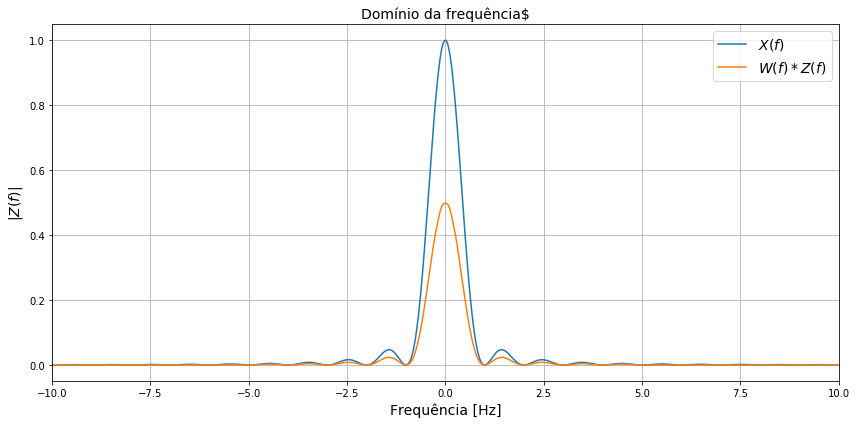

In [44]:
plt.figure(figsize=(12,6));
plt.plot(f, abs(X));
plt.plot(f, abs(Z)*abs(W));
plt.grid();
plt.legend((r'$X(f)$', r'$W(f)*Z(f)$'), loc='upper right', fontsize = 14);
plt.title(r'Domínio da frequência$', fontsize = 14);
plt.xlim([-10,10]);
plt.xlabel(r'Frequência [Hz]', fontsize = 14);
plt.ylabel(r'$|Z(f)|$', fontsize = 14);
plt.tight_layout();

# Então qual o problema que poderemos ter?

In [49]:
Fc_d = 1.20 * Fc;
z_d = y * num.cos(2 * num.pi * Fc_d * t);
f,Z_d = ss.ft_approx(z_d, t, 4096);

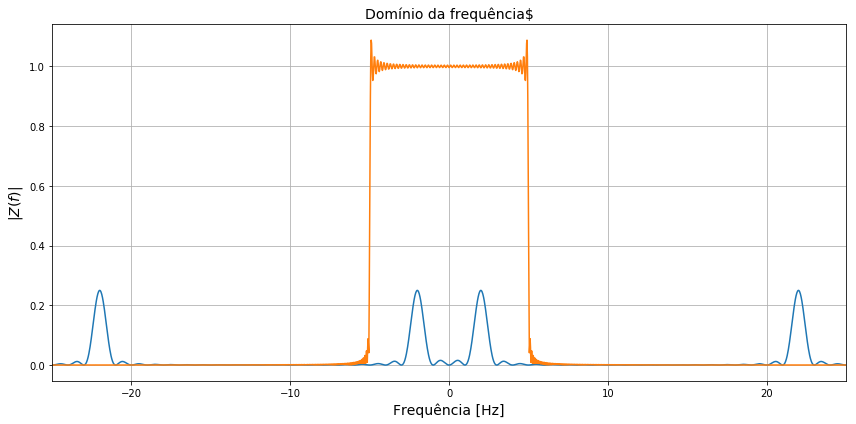

In [51]:
plt.figure(figsize=(12,6));
plt.plot(f, abs(Z_d));
plt.plot(f, abs(W));
plt.grid()
plt.title(r'Domínio da frequência$', fontsize = 14);
plt.xlim([-25,25])
plt.xlabel(r'Frequência [Hz]', fontsize = 14);
plt.ylabel(r'$|Z(f)|$', fontsize = 14);
plt.tight_layout();

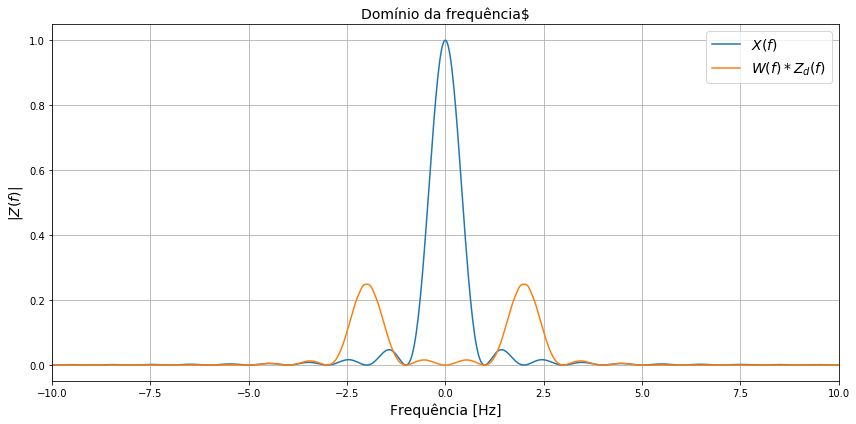

In [52]:
plt.figure(figsize=(12,6));
plt.plot(f, abs(X));
plt.plot(f, abs(Z_d)*abs(W));
plt.grid();
plt.legend((r'$X(f)$', r'$W(f)*Z_d(f)$'), loc='upper right', fontsize = 14);
plt.title(r'Domínio da frequência$', fontsize = 14);
plt.xlim([-10,10]);
plt.xlabel(r'Frequência [Hz]', fontsize = 14);
plt.ylabel(r'$|Z(f)|$', fontsize = 14);
plt.tight_layout();

# Ou algo pior ...

In [56]:
Fc_d = num.linspace(0.8, 1.2, len(t));
z_d = y * num.cos(2 * num.pi * Fc_d * t);
f,Z_d = ss.ft_approx(z_d, t, 4096);

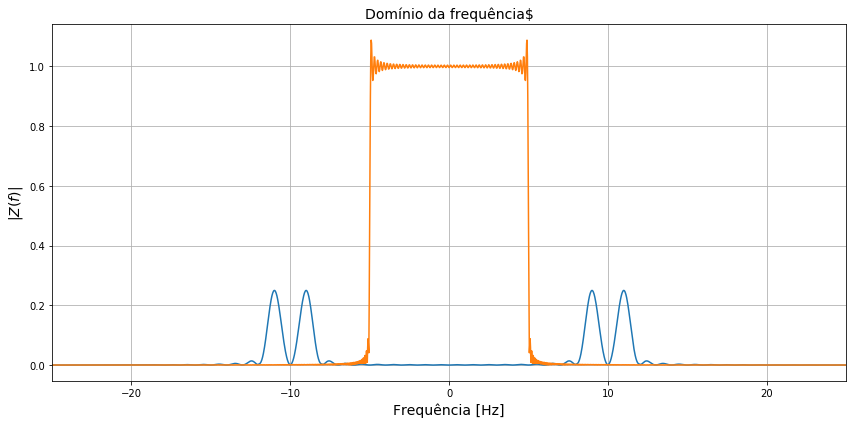

In [59]:
plt.figure(figsize=(12,6));
plt.plot(f, abs(Z_d));
plt.plot(f, abs(W));
plt.grid()
plt.title(r'Domínio da frequência$', fontsize = 14);
plt.xlim([-25,25])
plt.xlabel(r'Frequência [Hz]', fontsize = 14);
plt.ylabel(r'$|Z(f)|$', fontsize = 14);
plt.tight_layout();

## Stream de bits

In [4]:
N  = 2**12; # número de bits
Fb = 10;    # bit rate   [bps]
Tb = 1/Fb;  # bit period [s]
Ns = 16;    # samples per bit
Fs = Fb*Ns  # sample rate

In [5]:
x, b, d = ss.NRZ_bits(N, Ns, 'rect');
t = num.arange(0, N/Fb, 1/Fs);
NFFT  = N * Ns/2;
f, X = ss.ft_approx(x, t, NFFT);

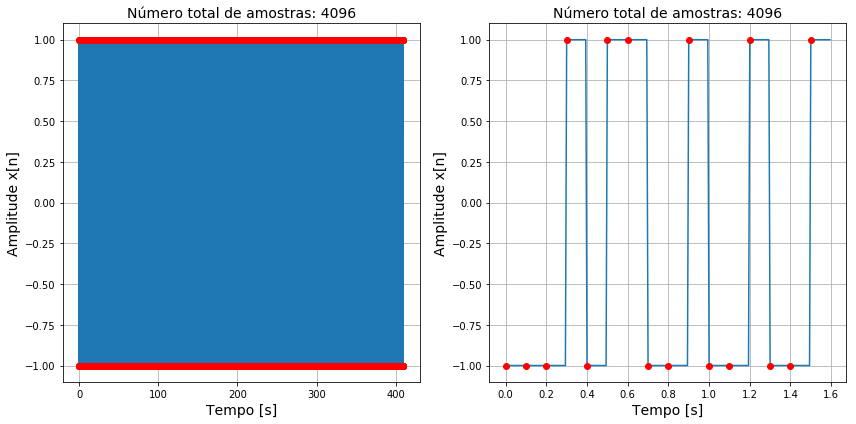

In [6]:
plt.figure(figsize=(12,6));
plt.subplot(121);
plt.plot(t, x,
         t[0::Ns], 2*d-1, 'ro');
plt.grid();
plt.xlabel(r'Tempo [s]', fontsize = 14);
plt.ylabel(r'Amplitude x[n]', fontsize = 14);
plt.title(r'Número total de amostras: ' + repr(N), fontsize = 14);
plt.subplot(122);
plt.plot(t[0:16*Ns:], x[0:16*Ns:],
         t[0:16*Ns:Ns], 2*d[0:16:]-1, 'ro');
plt.grid();
plt.xlabel(r'Tempo [s]', fontsize = 14);
plt.ylabel(r'Amplitude x[n]', fontsize = 14);
plt.title(r'Número total de amostras: ' + repr(N), fontsize = 14);
plt.tight_layout();

In [7]:
f, X = ss.ft_approx(x, t, NFFT);
fl, Xl = ss.ft_approx(x[0:16*Ns:], t[0:16*Ns:], 16*Ns);

C:\Users\Amanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Amanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


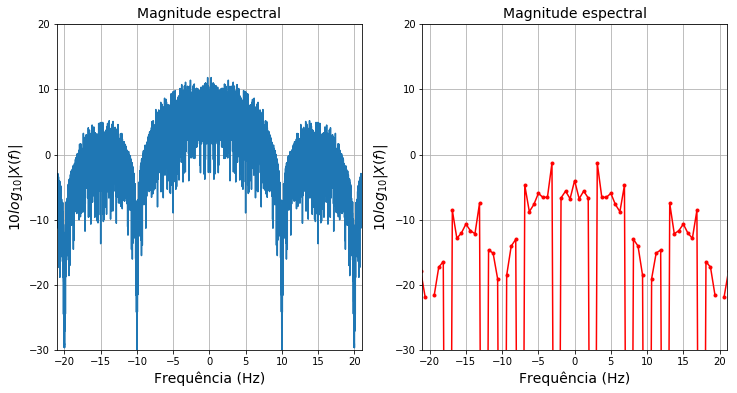

In [8]:
plt.figure(figsize=(12,6));
plt.subplot(121);
plt.plot(f, 10*num.log10(num.abs(X)));
plt.grid()
plt.xlim([-21,21])
plt.ylim([-30,20])
plt.title(r'Magnitude espectral', fontsize = 14);
plt.xlabel(r'Frequência (Hz)', fontsize = 14);
plt.ylabel(r'$10log_{10}|X(f)|$', fontsize = 14);

plt.subplot(122);
plt.plot(fl, 10*num.log10(num.abs(Xl)), 'r.-');
plt.grid()
plt.xlim([-21,21])
plt.ylim([-30,20])
plt.title(r'Magnitude espectral', fontsize = 14);
plt.xlabel(r'Frequência (Hz)', fontsize = 14);
plt.ylabel(r'$10log_{10}|X(f)|$', fontsize = 14);

In [9]:
Fc1 = 10; # Carrier #01 - 10 Hz
Fc2 = 20; # Carrier #02 - 20 Hz

# RECT shape
x1_c = x*num.cos(2*num.pi*Fc1*t);
x2_c = x*num.cos(2*num.pi*Fc2*t);
f1, X1_c = ss.ft_approx(x1_c, t, NFFT);
f2, X2_c = ss.ft_approx(x2_c, t, NFFT);

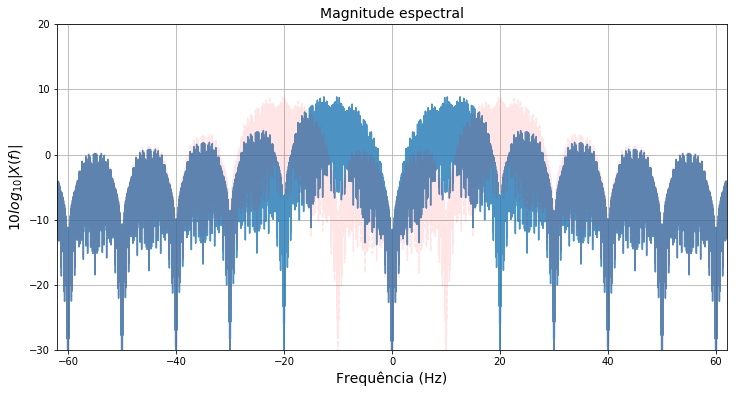

In [10]:
plt.figure(figsize=(12,6))
plt.plot(f1, 10*num.log10(num.abs(X1_c)), alpha = 0.80);
plt.plot(f2, 10*num.log10(num.abs(X2_c)), 'r--', alpha = 0.10);
plt.grid()
plt.xlim([-62,62])
plt.ylim([-30,20])
plt.title(r'Magnitude espectral', fontsize = 14)
plt.xlabel(r'Frequência (Hz)', fontsize = 14)
plt.ylabel(r'$10log_{10}|X(f)|$', fontsize = 14);

## Como adicionar um novo sinal em 40 Hz?

In [11]:
Fc3 = 40; # Carrier #02 - 25 Hz

# RECT shape
x3_c = x*num.cos(2*num.pi*Fc3*t);
f3, X3_c = ss.ft_approx(x3_c, t, NFFT);

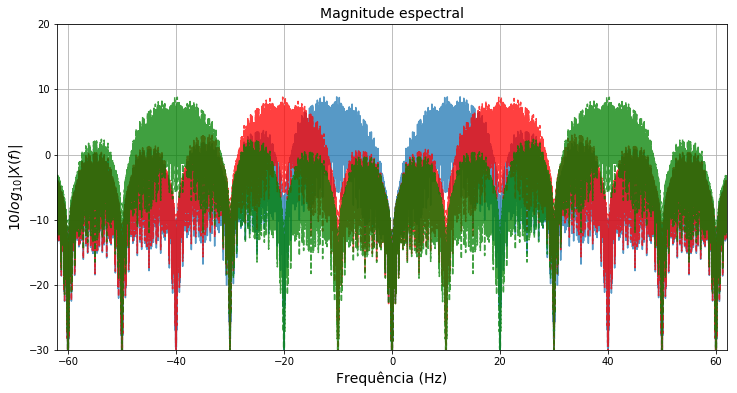

In [12]:
plt.figure(figsize=(12,6))
plt.plot(f1, 10*num.log10(num.abs(X1_c)), alpha = 0.75);
plt.plot(f2, 10*num.log10(num.abs(X2_c)), 'r--', alpha = 0.75);
plt.plot(f3, 10*num.log10(num.abs(X3_c)), 'g--', alpha = 0.75);
plt.grid()
plt.xlim([-62,62])
plt.ylim([-30,20])
plt.title(r'Magnitude espectral', fontsize = 14)
plt.xlabel(r'Frequência (Hz)', fontsize = 14)
plt.ylabel(r'$10log_{10}|X(f)|$', fontsize = 14);

## Como melhorar a eficiência espectral?

In [13]:
from sk_dsp_comm.sigsys import rc_imp
b = rc_imp(10, 0.1);
n = num.arange(-10*6,10*6+1);
f_RC, X_RC = ss.ft_approx(b, n, 4096);

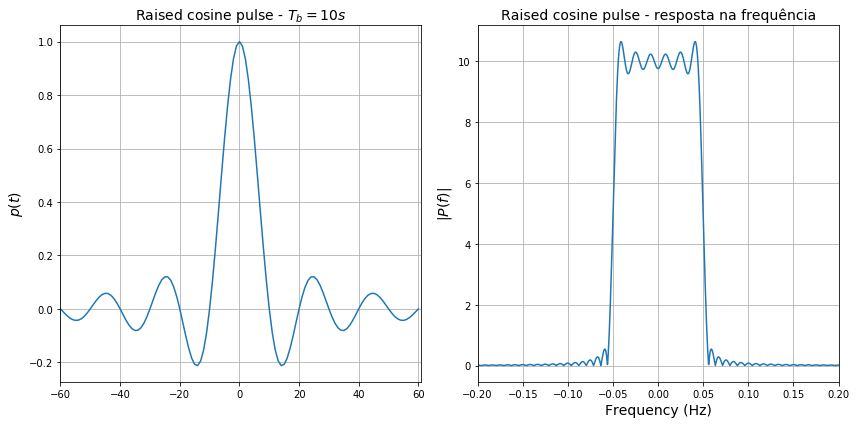

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(121);
plt.plot(n, b)
plt.title(r'Raised cosine pulse - $T_b = 10s$', fontsize = 14);
plt.ylabel(r'$p(t)$', fontsize = 14);
plt.xlim(-10*6,10*6+1)
plt.grid()

plt.subplot(122);
plt.plot(f_RC,num.abs(X_RC))
plt.title(r'Raised cosine pulse - resposta na frequência', fontsize = 14);
plt.xlabel(r'Frequency (Hz)', fontsize = 14);
plt.ylabel(r'$|P(f)|$', fontsize = 14);
plt.xlim(-0.2,0.2)
plt.grid()
plt.tight_layout();

In [15]:
b = rc_imp(10, 0.75);
n = num.arange(-10*6, 10*6+1);
f_RC, X_RC = ss.ft_approx(b, n, 4096);

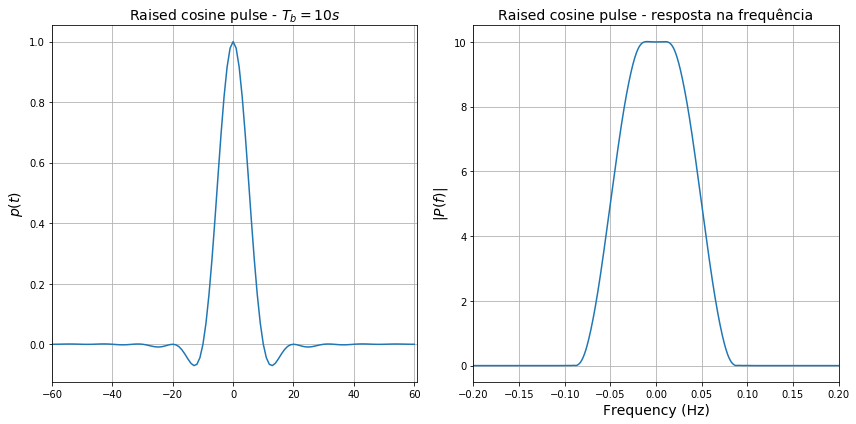

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(121);
plt.plot(n, b)
plt.title(r'Raised cosine pulse - $T_b = 10s$', fontsize = 14);
plt.ylabel(r'$p(t)$', fontsize = 14);
plt.xlim(-10*6,10*6+1)
plt.grid()

plt.subplot(122);
plt.plot(f_RC, num.abs(X_RC))
plt.title(r'Raised cosine pulse - resposta na frequência', fontsize = 14);
plt.xlabel(r'Frequency (Hz)', fontsize = 14);
plt.ylabel(r'$|P(f)|$', fontsize = 14);
plt.xlim(-0.2,0.2)
plt.grid()
plt.tight_layout();

In [17]:
t_rect  = num.arange(-5, 5, 1/Fs)
x_rect = ss.rect(t_rect+1/2,1)-ss.rect(t_rect-1/2,1)

b   = rc_imp(16, 0.1)
y   = signal.lfilter(b, 1, x_rect)/16

In [18]:
def foo(a, start, stop): 
    # fn to convert your start stop to a wrapped range
    if stop<=start:
        stop += len(a)
    return num.arange(start, stop)%len(a)

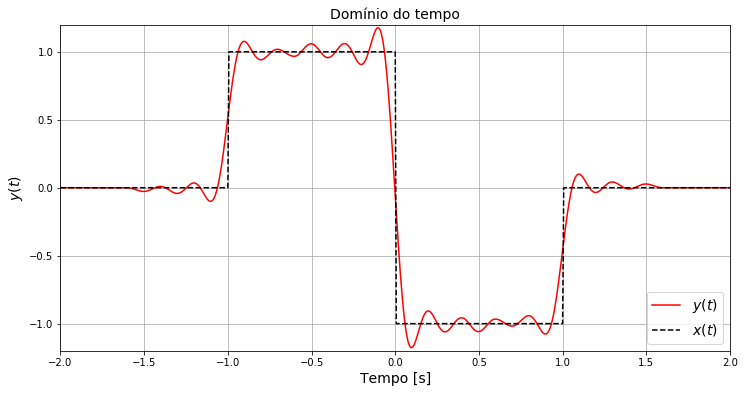

In [21]:
plt.figure(figsize=(12,6))
plt.plot(t_rect, y[foo(t_rect, 97, 97)], 'r', t_rect, x_rect, 'k--');
plt.ylim([-1.2,1.2])
plt.xlim([-2,2])
plt.legend((r'$y(t)$', r'$x(t)$'), loc='lower right', fontsize = 14);
plt.title(r'Domínio do tempo', fontsize = 14);
plt.xlabel(r'Tempo [s]', fontsize = 14);
plt.ylabel(r'$y(t)$', fontsize = 14);
plt.grid();

In [22]:
f_RC, Y_RC = ss.ft_approx(y,  t_rect, 4096)
f_RC, X_RC = ss.ft_approx(x_rect, t_rect, 4096)

C:\Users\Amanda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


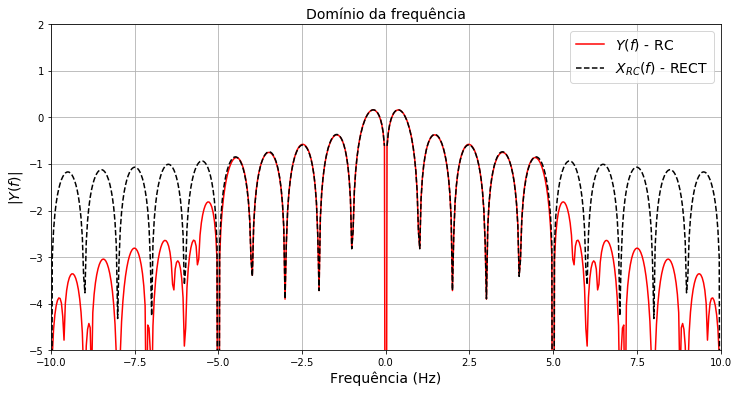

In [23]:
plt.figure(figsize=(12,6))
plt.plot(f_RC, num.log10(abs(Y_RC)), 'r', f_RC, num.log10(abs(X_RC)), 'k--')
plt.grid()
plt.title(r'Domínio da frequência', fontsize = 14);
plt.xlim([-10,10])
plt.ylim([-5,2])
plt.xlabel(r'Frequência (Hz)', fontsize = 14);
plt.ylabel(r'$|Y(f)|$', fontsize = 14);
plt.legend((r'$Y(f)$ - RC', r'$X_{RC}(f)$ - RECT'), fontsize = 14);

In [24]:
b    = rc_imp(16, 0.35)
x_rc = signal.lfilter(b, 1, x)/16

x1_c_rc = x_rc * num.cos(2*num.pi*Fc1*t);
x2_c_rc = x_rc * num.cos(2*num.pi*Fc2*t);
x3_c_rc = x_rc * num.cos(2*num.pi*Fc3*t);

f1, X1_c_rc = ss.ft_approx(x1_c_rc, t, NFFT);
f2, X2_c_rc = ss.ft_approx(x2_c_rc, t, NFFT);
f3, X3_c_rc = ss.ft_approx(x3_c_rc, t, NFFT);

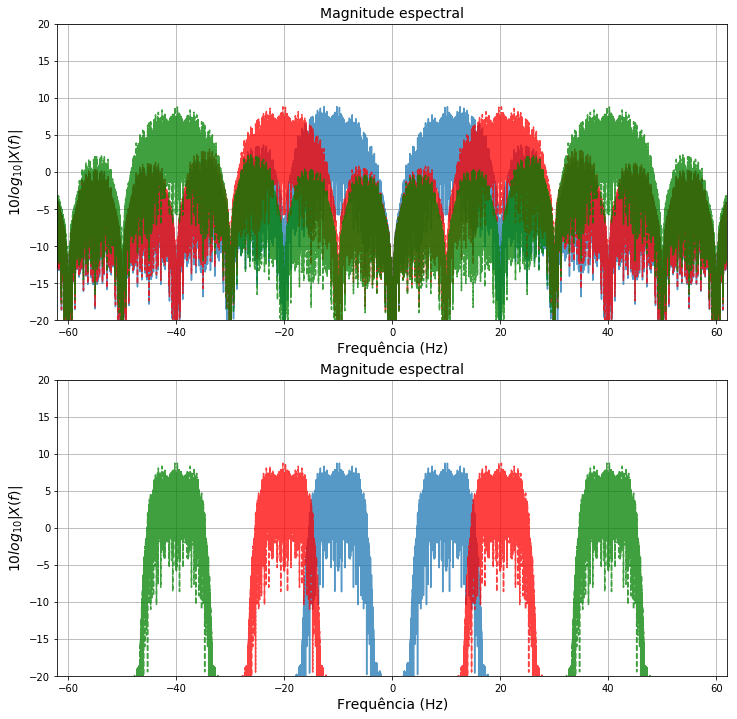

In [27]:
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.plot(f1, 10*num.log10(num.abs(X1_c)), alpha = 0.75);
plt.plot(f2, 10*num.log10(num.abs(X2_c)), 'r--', alpha = 0.75);
plt.plot(f3, 10*num.log10(num.abs(X3_c)), 'g--', alpha = 0.75);
plt.grid()
plt.xlim([-62,62])
plt.ylim([-20,20])
plt.title(r'Magnitude espectral', fontsize = 14)
plt.xlabel(r'Frequência (Hz)', fontsize = 14)
plt.ylabel(r'$10log_{10}|X(f)|$', fontsize = 14);

plt.subplot(212)
plt.plot(f1, 10*num.log10(num.abs(X1_c_rc)), alpha = 0.75);
plt.plot(f2, 10*num.log10(num.abs(X2_c_rc)), 'r--', alpha = 0.75);
plt.plot(f3, 10*num.log10(num.abs(X3_c_rc)), 'g--', alpha = 0.75);
plt.grid()
plt.xlim([-62,62])
plt.ylim([-20,20])
plt.title(r'Magnitude espectral', fontsize = 14)
plt.xlabel(r'Frequência (Hz)', fontsize = 14)
plt.ylabel(r'$10log_{10}|X(f)|$', fontsize = 14);